In [23]:
import numpy as np
import random
import pickle

from src_nna.axon_approx.src.axon_approximation import axon_algorithm
from src_nna.axon_approx.src.axon_model_jax import train_random_model_jax
from tqdm import tqdm

import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rcParams.update({"text.usetex": True})

In [7]:
def plot_errors(data, data_rnd, title):
    plt.plot(np.arange(1,101), data, lw=1.1, label='axon algorithm')
    plt.plot(np.arange(1,len(data_rnd)+1), data_rnd, lw=1.1, label='random initialization')
    plt.yscale('log')
    plt.ylabel('error')
    plt.xlabel('K')
    plt.title(title)
    plt.legend()
    plt.xticks(np.arange(0,102, 10))

In [8]:
def plot_basis(data, name):
    plt.figure(figsize=(10,6))
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.ylabel(r'$\phi_{}(x)$'.format(i))
        plt.xlabel(r'$x$')
        if i == 0:
            plt.plot(np.linspace(0,1,1000), np.ones(1000)*data[0,0]) 
            # otherwise the constant function is has strange value
        else:
            plt.plot(np.linspace(0,1,1000), data[:,i])
    plt.tight_layout()

## 1D case

Here we present several examples of applying our algorithm and compare its performance with classical training.
For the fast computation, we train the network only a few epochs and only for a few number of basis functions

In [9]:
xs = np.linspace(0, 1, 1000)[:,None]

1. First we consider function $f(x) = x^2$

In [10]:
# our method of network training

ys = (xs**2).flatten()
bs_x2, bs_coefs, r, coefs, norms, errs_x2 = axon_algorithm(xs, ys, 100)

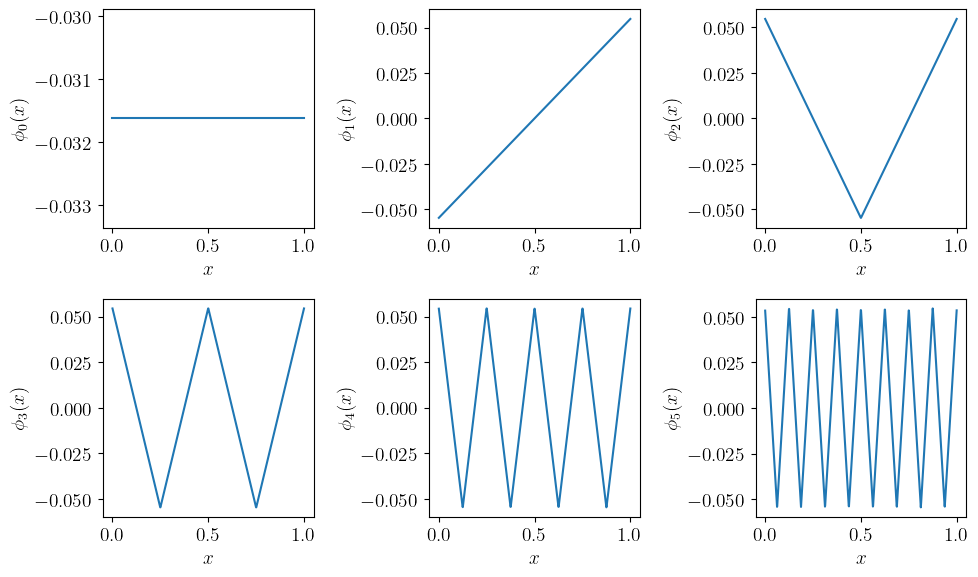

In [11]:
# obtained basis functions
plot_basis(bs_x2, r'$x^2$')

We can compare accuracy of our algorithm with convenitional training with random initialization. We select minimal error over 20 runs. In the paper the number of epochs is 1000, here it is 10 only for the quick demonstration

In [12]:
# classical training with random initialization
errs_rnd = []
for k in tqdm(range(1,10)):
    err_k = train_random_model_jax(xs, lambda x: x**2, K=k, num_epochs=300, num_iters=50, learning_rate=7e-2)
    err_k = [err for err in err_k if not np.isnan(err)] # to avoid nans when min is searched
    errs_rnd.append(min(err_k))

100%|██████████| 9/9 [00:49<00:00,  5.48s/it]


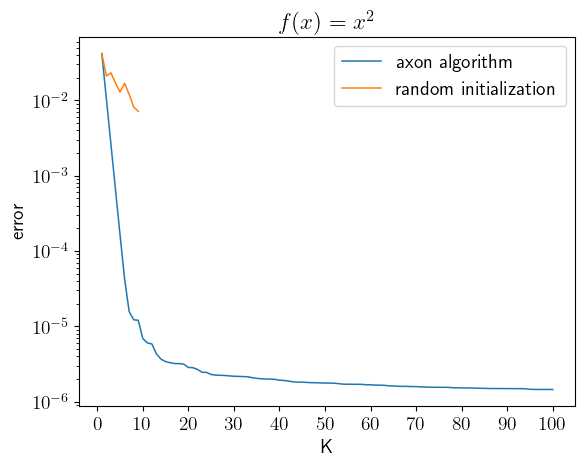

In [13]:
plot_errors(errs_x2, errs_rnd, r'$f(x)=x^2$')

2. Another example is $f(x) = \sqrt{x}$

In [14]:
ys = np.sqrt(xs).flatten()
bs_sqrt, bs_coefs, r, coefs, norms, errs_sqrt = axon_algorithm(xs, ys, 100)

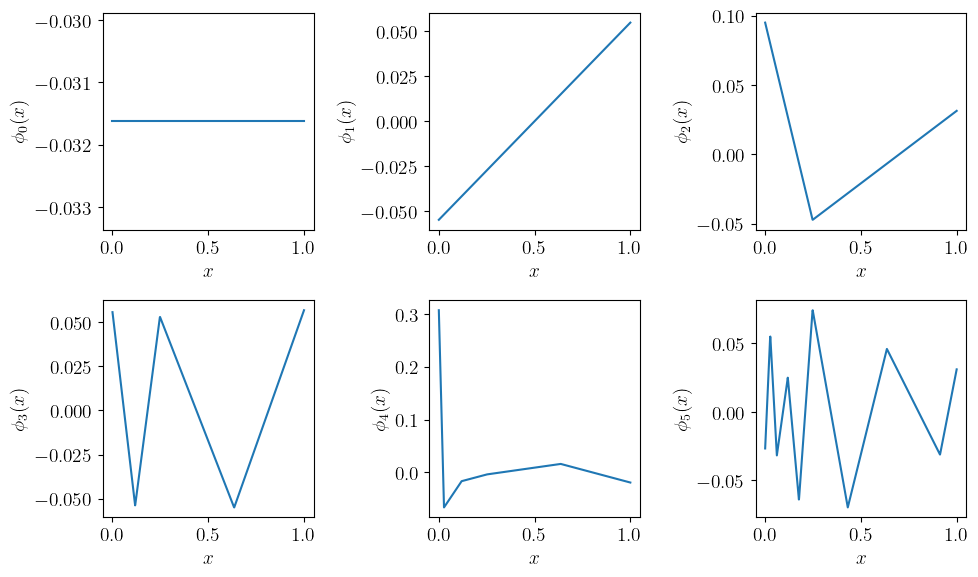

In [15]:
# obtained basis functions
plot_basis(bs_sqrt, r'$x^2$')

In [16]:
# classical training with random initialization
errs_rnd = []
for k in tqdm(range(1,10)):
    err_k = train_random_model_jax(xs, lambda x: np.sqrt(x), K=k, num_epochs=300, num_iters=70, learning_rate=7e-2)
    err_k = [err for err in err_k if not np.isnan(err)] # to avoid nans when min is searched
    errs_rnd.append(min(err_k))


100%|██████████| 9/9 [01:07<00:00,  7.48s/it]


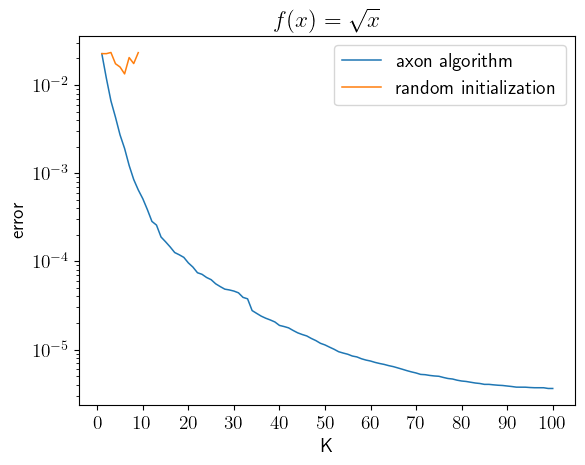

In [17]:
plot_errors(errs_sqrt, errs_rnd,  r'$f(x)=\sqrt{x}$')

$x^{3}$

In [19]:
ys = np.power(xs,3).flatten()
bs_p3, bs_coefs, r, coefs, norms, errs_p3 = axon_algorithm(xs, ys, 100)

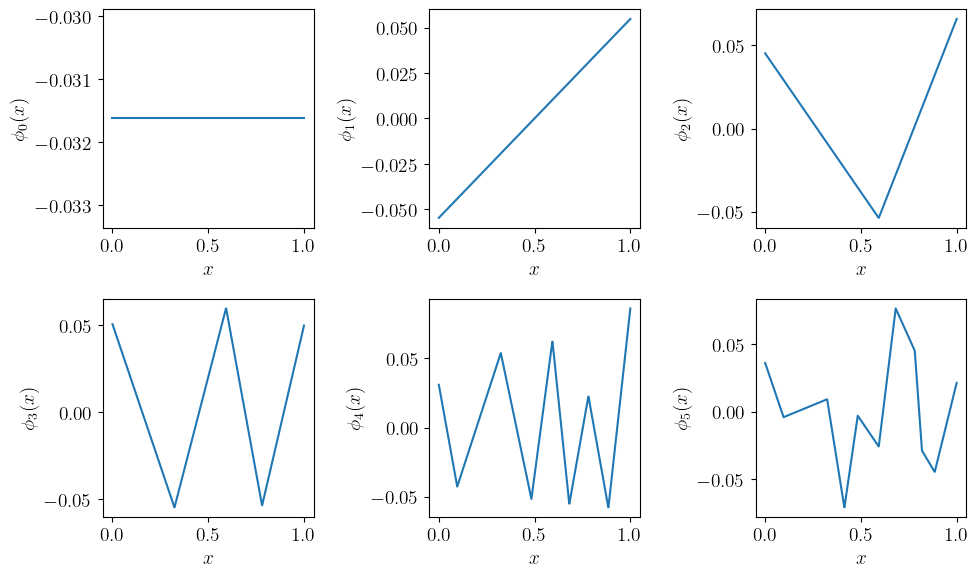

In [20]:
# obtained basis functions
plot_basis(bs_p3, r'$x^3$')

In [21]:
# classical training with random initialization
errs_rnd = []
for k in tqdm(range(1,10)):
    err_k = train_random_model_jax(xs, lambda x: np.power(x,3), K=k, num_epochs=300, num_iters=100, learning_rate=7e-2)
    err_k = [err for err in err_k if not np.isnan(err)] # to avoid nans when min is searched
    errs_rnd.append(min(err_k))

100%|██████████| 9/9 [01:04<00:00,  7.18s/it]


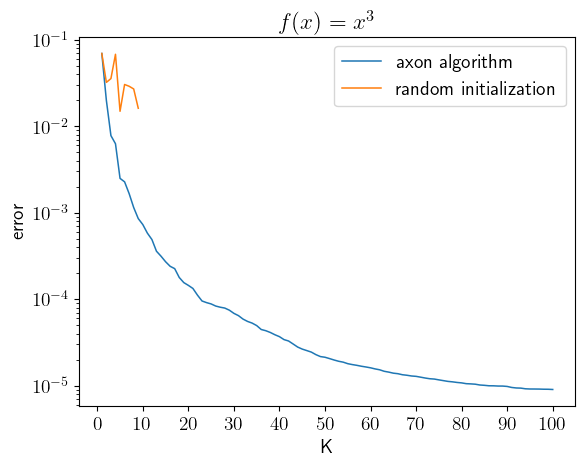

In [22]:
plot_errors(errs_p3, errs_rnd, r'$f(x)=x^{3}$')

$\sqrt{x^2+y^2}$

In [24]:
def f(x):
    return np.sqrt(xs[:,0]**2+xs[:,1]**2).astype(np.float64)

In [25]:
x = np.linspace(-1,1,100)
xx, yy = np.meshgrid(x,x)
xs = np.hstack([xx.flatten()[:,np.newaxis], yy.flatten()[:,np.newaxis]])
ys = f(xs)
bs_2d, bs_coefs, r, coefs, norms, errs_2d = axon_algorithm(xs, ys, 100, new_obj=False)

/Users/shararehsayyad/anaconda3/envs/pinn/lib/python3.12/site-packages/nevergrad/optimization/base.py:147: LossTooLargeWarning: Clipping very high value 1.354712340513367e+21 in tell (rescale the cost function?).
  warnings.warn(msg, e)


In [ ]:
# errs_rnd = []
# with open('error_2d.pkl', 'rb') as f:
#     data = pickle.load(f)
#     for errs_k in data['error']:
#         errors1 = [err for err in errs_k if not np.isnan(err)]
#         errs_rnd.append(min(errors1))
# plot_errors(errs_2d, errs_rnd, r'$\sqrt{x^2+y^2}$')

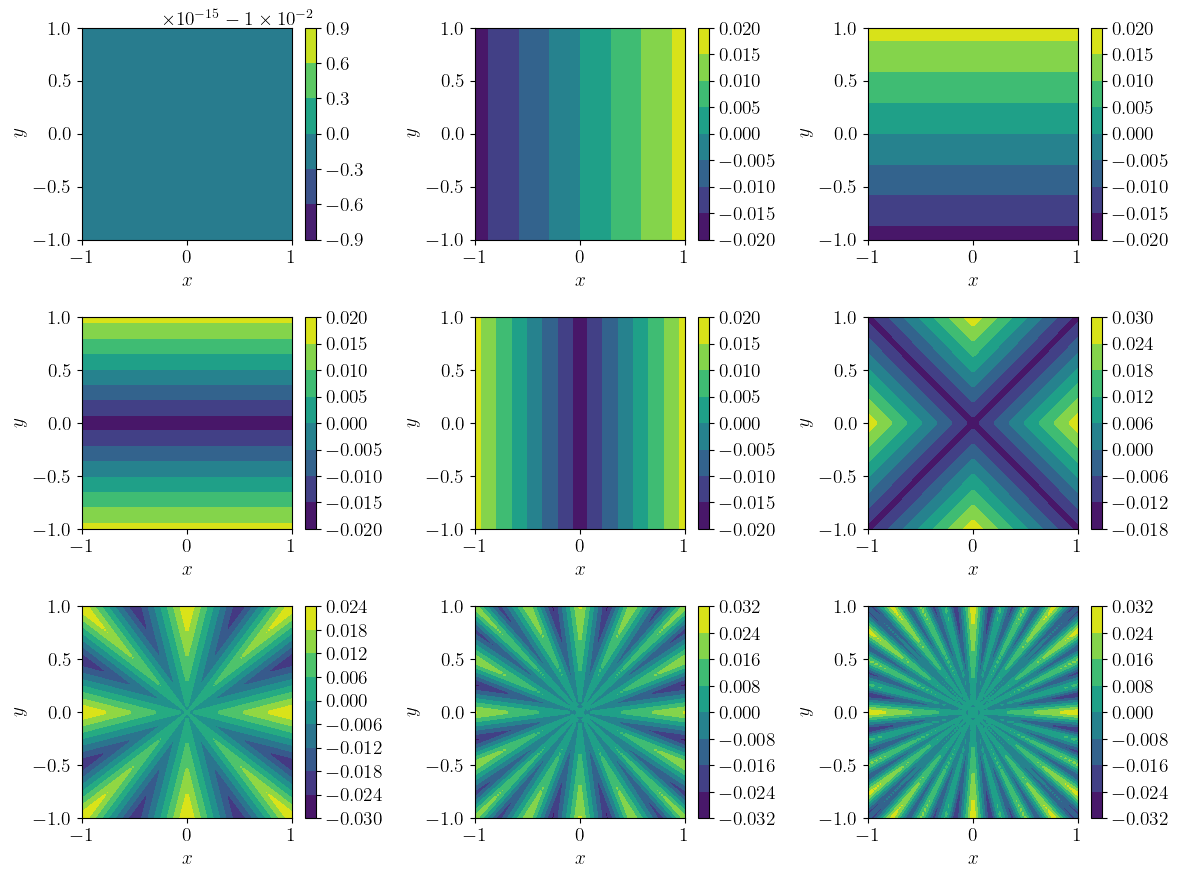

In [26]:
plt.figure(figsize=(12,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    #plt.title(r'$\phi_{}$'.format(i+5))
    plt.ylabel(r'$y$'.format(i))
    plt.xlabel(r'$x$')
    plt.contourf(xx, yy, bs_2d[:,i].reshape(100,100, order='C'))
    plt.colorbar()
plt.tight_layout()